# Monte Carlo integration
Shivam Kumaran <br>
SC17b122 <br>

<a href = 'https://colab.research.google.com/drive/15e6uB278wofjsK39miemIHe-MVxzu3Vw?usp=sharing'> Open Code</a>


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import random as rnd 
rnd.seed(98953739273947483723)
sb.set_style('darkgrid')

##  Function Definition

In [ ]:
def f(x):
    if(x!=0):
        val = (x**3)/(np.exp(x)-1)
    else:
        val = 0
    return val

### quick look

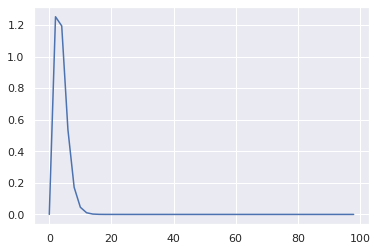

In [ ]:
x = np.linspace(0,1e2 , endpoint=False)
y = [f(x) for x in x]
plt.plot(x,y, '-')
plt.show()

## Integration Routine

### Generating random samples between given values

In [ ]:
def gen_rand_n(x_min ,x_max , n):
    x = []
    n = int(n)
    for i in range(n):
        mu = rnd.uniform(0,1)
        xi = x_min + mu*(x_max-x_min)
        x.append(xi)
    return x

In [ ]:
# calculating the distribution of integration value
# By taking N samples from set of x
def calc_dist_f(x, N , x_min , x_max):
    i = []
    for j in range(500):
        rnd.shuffle(x)
        x_sample = rnd.sample(x , int(N))
        i_n = (x_max-x_min)*sum([f(x) for x in x_sample])/N
        i.append(i_n)
    sigma = np.var(i)
    mean = np.mean(i)
    return (i , mean , sigma)

In [ ]:
x_min , x_max , n = 0 , 10 , 1e4 
x = gen_rand_n(x_min , x_max , n)
N1 , N2  = 100 , 500
i_1 , integ_val_1 , var_1 = calc_dist_f(x , N1 , x_min , x_max)
i_2 , integ_val_2 , var_2 = calc_dist_f(x , N2 , x_min , x_max)

In [ ]:
var_ratio = var_1/ var_2 
N_ratio = N2/N1
print('Ratio of variance:' , var_ratio)
print('Ratio of N:' , N_ratio)
#print(var_ratio , N_ratio)

5.016913335522229 5.0


In [ ]:
def histogram(x,bins):
    if(type(bins)=='int'):
        hist , bins = histogram_const_bin(x,bins)
    else:
        hist , bins = histogram_given_bin(x,bins)
    return(hist, bins)

def histogram_const_bin(x, bins):
    x = np.asarray(x)
    v_min = np.amin(x)
    v_max = np.amax(x)
    h = (v_max-v_min)/bins
    #print(v_min , v_max)
    hist = []
    x_axis = []
    for i in range(bins):
        temp_min = v_min+i*h
        temp_max = v_min+(i+1)*h
        #print(temp_min, temp_max)
        temp = [x_val for x_val in x if ((x_val>temp_min) and (x_val<=temp_max))] 
        #print(temp)
        count = len(temp)
        hist.append(count)
        x_axis.append((temp_min+temp_max)/2)
    return(hist , x_axis)

def histogram_given_bin(x, bins):
    x = np.asarray(x)
    v_min = np.amin(x)
    v_max = np.amax(x)
    h = (v_max-v_min)/bins
    #print(v_min , v_max)
    hist = []
    x_axis = []
    for i in range(len(bins)):
        temp = [x_val for x_val in x if ((x_val>bins[i]) and (x_val<=bins[i+1]))] 
        #print(temp)
        count = len(temp)
        hist.append(count)
        #x_axis.append((temp_min+temp_max)/2)
    return(hist, bins)


500 500


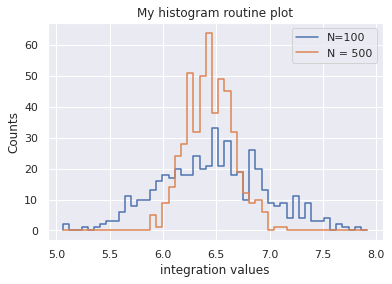

In [ ]:
print(len(i_1) , len(i_2))
min_max = [np.amin(i_1) , np.amin(i_2) , np.amax(i_1) , np.amax(i_2)]
bin_min , bin_max = np.amin(min_max) , np.amax(min_max)
bins = np.linspace(bin_min, bin_max , 50)
h_1 = histogram(i_1, bins)
h_2 = histogram(i_2, bins)
plt.step(h_1[1],h_1[0])
plt.step(h_2[1],h_2[0])
plt.ylabel('Counts')
plt.xlabel('integration values')
plt.legend(['N=100' , 'N = 500'])
plt.title('My histogram routine plot')
plt.show()

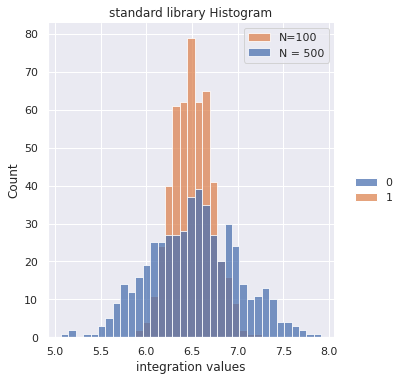

In [ ]:
sb.displot(data = [i_1 , i_2])
plt.xlabel('integration values')
plt.legend(['N=100' , 'N = 500'])
plt.title('standard library Histogram')
#plt.hist(i_2 , bins = 25)
plt.show()

### Optimum $x_{max}$ 


In [ ]:
def calc_optimal_x(x_min , x_max):
    i = []
    N = 100
    for j in range(500):
        x = gen_rand_n(x_min , x_max , 1e4)
        x_sample = rnd.sample(x ,  N )
        i_n = (x_max-x_min)*sum([f(x) for x in x_sample])/N
        i.append(i_n)
    sigma = np.var(i)
    mean = np.mean(i)
    return (i , mean , sigma)

In [ ]:
x_min = 0 
n = 1e4 
N1 = 100
x_m = np.linspace(1 , 20 , 20)
integ_values = []
integ_distrib = []
for x_max in x_m:
    #x = gen_rand_n(x_min , x_max , n)
    i , integ_val , var= calc_optimal_x(x_min , x_max)
    integ_values.append(integ_val)
    integ_distrib.append(i)
    print(integ_val , var)

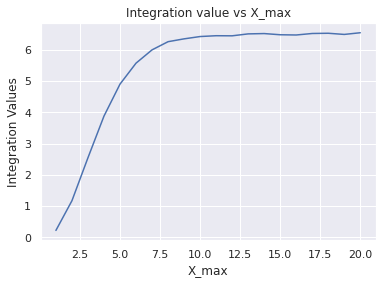

In [ ]:
plt.plot(x_m , integ_values )
plt.title('Integration value vs X_max')
plt.xlabel('X_max')
plt.ylabel('Integration Values')
plt.show()

### Inference
We see that after about x_max = 10 , integration value keeps fluctuating.


In [ ]:
x_min = 0 
n = 1e4 
N1 = 100
x_max = 1
delta_x = 1
tol = 0.001
_ , prev , _ = calc_optimal_x(x_min , 1)
x_max+=1
_ , next , _ = calc_optimal_x(x_min , x_max)
err = abs(next-prev)
while(err >= tol):
    x_max = x_max + delta_x
    prev   = next
    _ , next , _ = calc_optimal_x(x_min , x_max)
    err = abs(next-prev)
    #print(err)
    print('x_max: {} , Integ Value: {:.5f}'.format(x_max , next))
#    print(x_max , next)

x_max: 3 , Integ Value: 2.54907
x_max: 4 , Integ Value: 3.88257
x_max: 5 , Integ Value: 4.89839
x_max: 6 , Integ Value: 5.59349
x_max: 7 , Integ Value: 6.00188
x_max: 8 , Integ Value: 6.24364
x_max: 9 , Integ Value: 6.35254
x_max: 10 , Integ Value: 6.45101
x_max: 11 , Integ Value: 6.42733
x_max: 12 , Integ Value: 6.45765
x_max: 13 , Integ Value: 6.44730
x_max: 14 , Integ Value: 6.53817
x_max: 15 , Integ Value: 6.46736
x_max: 16 , Integ Value: 6.46659


In [ ]:
print(x_max)
n =  1e4 
x = gen_rand_n(x_min , x_max , n)
N1  = 500 
i , integ_val , var = calc_dist_f(x , N1 , x_min , x_max)

16


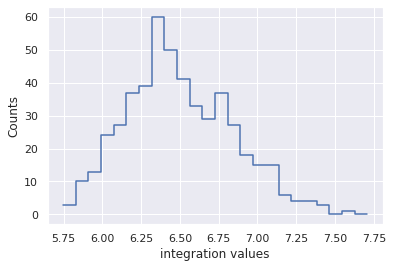

In [ ]:
bin_min , bin_max = np.amin(i) , np.amax(i)
bins = np.linspace(bin_min, bin_max , 25)
h_1 = histogram(i, bins)
plt.step(h_1[1],h_1[0])
plt.ylabel('Counts')
plt.xlabel('integration values')
plt.show()